In [1]:
import pandas as pd 
import os 
import shutil
import random 
import glob 
from bs4 import BeautifulSoup
from tqdm import tqdm 

In [28]:
PATH_TO_CODENET = "/home/alex/Documents/PennPhD/learning2perf/data/Project_CodeNet"
PATH_TO_METADATA = "/home/alex/Documents/PennPhD/learning2perf/data/Project_CodeNet/metadata"
PATH_TO_PROBLEM_DESC = "/home/alex/Documents/PennPhD/learning2perf/data/Project_CodeNet/problem_descriptions_translated"
PATH_TO_DATA = "/home/alex/Documents/PennPhD/learning2perf/data/Project_CodeNet/data"
PATH_TO_TESTCASES = "/home/alex/Documents/PennPhD/learning2perf/data/codenet/merged_test_cases"
PATH_TO_PROBLEM_DESC_ORIG = "/home/alex/Documents/PennPhD/learning2perf/data/Project_CodeNet/problem_descriptions"


# problem desc is /{problem_id}.html
# metadata is /{problem_id}.csv
# data is /{problem_id}/LANG/{submission_id}.{ext}
# testcases is /{problem_id}/input.*.txt and /{problem_id}/output.*.txt

def html_string_to_text(html_string):
    soup = BeautifulSoup(html_string, 'html.parser')
    return soup.get_text()


def print_n_from_dict(d, n=5, max_len=100):
    for i, (k, v) in enumerate(d.items()):
        if type(v) == str and len(v) > max_len:
            print(f"{k}: {v[:max_len]}...")
        else: 
            print(f"{k}: {v}")
        if i > n:
            break



In [11]:
problem_id_2_html = {}
problem_id_2_text = {}
import traceback

all_html_files = glob.glob(os.path.join(PATH_TO_PROBLEM_DESC, "*.html"))
for html_file in tqdm(all_html_files):
    problem_id = os.path.basename(html_file).replace(".html", "")
    with open(html_file, "r") as f:
        html_string = f.read()
        problem_id_2_html[problem_id] = html_string
        try: 
            problem_id_2_text[problem_id] = html_string_to_text(html_string)
        except Exception as e:
            problem_id_2_text[problem_id] = html_string
            print(f"Error processing {problem_id}")
            traceback.print_exc()
        

        
print_n_from_dict(problem_id_2_text, 2)
print_n_from_dict(problem_id_2_html, 2)

 94%|█████████▎| 3742/3999 [00:02<00:00, 1297.30it/s]Traceback (most recent call last):
  File "/tmp/ipykernel_470939/1050089094.py", line 12, in <module>
    problem_id_2_text[problem_id] = html_string_to_text(html_string)
  File "/tmp/ipykernel_470939/1421285147.py", line 15, in html_string_to_text
    soup = BeautifulSoup(html_string, 'html.parser')
  File "/home/alex/anaconda3/envs/py38_gem5/lib/python3.8/site-packages/bs4/__init__.py", line 344, in __init__
    raise ParserRejectedMarkup(
bs4.builder.ParserRejectedMarkup: The markup you provided was rejected by the parser. Trying a different parser or a different encoding may help.

Original exception(s) from parser:
 unknown status keyword 'C' in marked section
100%|██████████| 3999/3999 [00:03<00:00, 1248.31it/s]

Error processing p00194
p01245: 
Problem C: Magical Dungeon

Arthur C. Malory is a wandering valiant fighter (in a game world).


On...
p02649: 
Score : 800 points


Problem StatementGiven are N pairwise distinct non-negative integers A_1,A_2,\...
p01438: 
Problem B: Butterfly

Claire is a man-eater. She's a real man-eater. She's going around with dozens...
p02830: 
Score : 200 points


Problem StatementGiven are strings s and t of length N each, both consisting o...
p01245: 
<H1><font color="#000">Problem C:</font> Magical Dungeon</H1>

<p>
Arthur C. Malory is a wandering ...
p02649: <span class="lang-en">
<p>Score : <var>800</var> points</p>
<div class="part">
<section>
<h3>Problem...
p01438: 
<H1><font color="#000">Problem B:</font> Butterfly</H1>

<p>
Claire is a man-eater. She's a real ma...
p02830: <span class="lang-en">
<p>Score : <var>200</var> points</p>
<div class="part">
<section>
<h3>Problem...


In [12]:
problem_id_2_html_orig = {}
problem_id_2_text_orig = {}

all_html_files = glob.glob(os.path.join(PATH_TO_PROBLEM_DESC_ORIG, "*.html"))
for html_file in tqdm(all_html_files):
    problem_id = os.path.basename(html_file).replace(".html", "")
    with open(html_file, "r") as f:
        html_string = f.read()
        problem_id_2_html_orig[problem_id] = html_string
        problem_id_2_text_orig[problem_id] = html_string_to_text(html_string)
        

100%|██████████| 3999/3999 [00:03<00:00, 1161.25it/s]


In [13]:
print(pd.Series(problem_id_2_text).apply(len).describe())
print(pd.Series(problem_id_2_html).apply(len).describe())

count     3999.000000
mean      1847.297324
std       1090.382192
min          0.000000
25%       1139.500000
50%       1643.000000
75%       2323.500000
max      20297.000000
dtype: float64
count     3999.000000
mean      2672.850963
std       1293.106508
min          1.000000
25%       1880.000000
50%       2529.000000
75%       3250.500000
max      27218.000000
dtype: float64


In [14]:
print(pd.Series(problem_id_2_text_orig).apply(len).describe())
print(pd.Series(problem_id_2_html_orig).apply(len).describe())

count     3999.000000
mean      1591.359840
std       1061.352577
min          1.000000
25%        947.000000
50%       1345.000000
75%       1915.000000
max      20297.000000
dtype: float64
count     3999.000000
mean      2506.493623
std       1319.754792
min          1.000000
25%       1699.000000
50%       2315.000000
75%       3050.000000
max      27218.000000
dtype: float64


dict_keys([])

 20%|██        | 801/3999 [00:02<00:08, 381.19it/s]Traceback (most recent call last):
  File "/tmp/ipykernel_470939/2506468446.py", line 13, in <module>
    problem_id_2_solve_rate[i] = calc_solve_rate(i)
  File "/tmp/ipykernel_470939/2506468446.py", line 7, in calc_solve_rate
    return len(submissions[accepted]) / len(submissions)
ZeroDivisionError: division by zero
 22%|██▏       | 876/3999 [00:02<00:10, 310.88it/s]

Error processing p02478


 44%|████▍     | 1762/3999 [00:04<00:05, 397.62it/s]Traceback (most recent call last):
  File "/tmp/ipykernel_470939/2506468446.py", line 13, in <module>
    problem_id_2_solve_rate[i] = calc_solve_rate(i)
  File "/tmp/ipykernel_470939/2506468446.py", line 7, in calc_solve_rate
    return len(submissions[accepted]) / len(submissions)
ZeroDivisionError: division by zero
 46%|████▋     | 1852/3999 [00:04<00:05, 380.97it/s]

Error processing p02533


 57%|█████▋    | 2287/3999 [00:06<00:04, 367.01it/s]Traceback (most recent call last):
  File "/tmp/ipykernel_470939/2506468446.py", line 13, in <module>
    problem_id_2_solve_rate[i] = calc_solve_rate(i)
  File "/tmp/ipykernel_470939/2506468446.py", line 7, in calc_solve_rate
    return len(submissions[accepted]) / len(submissions)
ZeroDivisionError: division by zero
Traceback (most recent call last):
  File "/tmp/ipykernel_470939/2506468446.py", line 13, in <module>
    problem_id_2_solve_rate[i] = calc_solve_rate(i)
  File "/tmp/ipykernel_470939/2506468446.py", line 7, in calc_solve_rate
    return len(submissions[accepted]) / len(submissions)
ZeroDivisionError: division by zero
 59%|█████▉    | 2374/3999 [00:06<00:04, 391.00it/s]

Error processing p02395
Error processing p02015


 98%|█████████▊| 3928/3999 [00:10<00:00, 358.92it/s]Traceback (most recent call last):
  File "/tmp/ipykernel_470939/2506468446.py", line 13, in <module>
    problem_id_2_solve_rate[i] = calc_solve_rate(i)
  File "/tmp/ipykernel_470939/2506468446.py", line 7, in calc_solve_rate
    return len(submissions[accepted]) / len(submissions)
ZeroDivisionError: division by zero
100%|██████████| 3999/3999 [00:10<00:00, 370.45it/s]

Error processing p02387


(array([ 41., 145., 421., 593., 636., 610., 517., 455., 213., 363.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

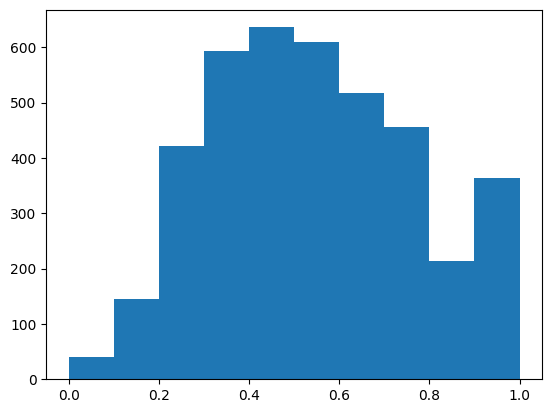

In [15]:
# demo_problem_id = pd.read_csv(os.path.join(PATH_TO_METADATA, "p00659.csv")) 
# demo_problem_id.head()
def calc_solve_rate(problem_id):
    problem_id = str(problem_id)
    submissions = pd.read_csv(os.path.join(PATH_TO_METADATA, f"{problem_id}.csv"))
    accepted = submissions["status"] == "Accepted" 
    return len(submissions[accepted]) / len(submissions)

# problem_id_2_solve_rate = {problem_id: calc_solve_rate(problem_id) for problem_id in problem_id_2_text.keys()}
problem_id_2_solve_rate = {}
for i in tqdm(problem_id_2_text.keys()):
    try: 
        problem_id_2_solve_rate[i] = calc_solve_rate(i)
    except Exception as e:
        print(f"Error processing {i}")
        traceback.print_exc()
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(list(problem_id_2_solve_rate.values()))

In [44]:
# print percentiles 
for i in range(0, 101, 5):
    print(f"number of above solve rate {i}: {len([v for v in problem_id_2_solve_rate.values() if v > i/100])}")
    print(f"proportion of above solve rate {i}: {len([v for v in problem_id_2_solve_rate.values() if v > i/100])/len(problem_id_2_solve_rate)}")
    print(f"")
    
high_solve_rate = {k: v for k, v in problem_id_2_solve_rate.items() if v > 0.80}
print(len(high_solve_rate))

number of above solve rate 0: 3978
proportion of above solve rate 0: 0.9959939909864797

number of above solve rate 5: 3968
proportion of above solve rate 5: 0.9934902353530295

number of above solve rate 10: 3952
proportion of above solve rate 10: 0.9894842263395093

number of above solve rate 15: 3899
proportion of above solve rate 15: 0.9762143214822233

number of above solve rate 20: 3799
proportion of above solve rate 20: 0.9511767651477215

number of above solve rate 25: 3619
proportion of above solve rate 25: 0.9061091637456185

number of above solve rate 30: 3387
proportion of above solve rate 30: 0.8480220330495744

number of above solve rate 35: 3106
proportion of above solve rate 35: 0.7776664997496244

number of above solve rate 40: 2784
proportion of above solve rate 40: 0.6970455683525288

number of above solve rate 45: 2469
proportion of above solve rate 45: 0.6181772658988482

number of above solve rate 50: 2129
proportion of above solve rate 50: 0.5330495743615423

num

In [29]:
import re

problem_id_to_inputs = {}
problem_id_to_outputs = {}


for problem_id in tqdm(problem_id_2_text):
    tc2input = {}
    tc2output = {}
    input_files = glob.glob(os.path.join(PATH_TO_TESTCASES, problem_id, "input.*.txt"))
    # output_files = glob.glob(os.path.join(PATH_TO_TESTCASES, problem_id, "output.*.txt"))
    if len(input_files) > 0:
        input_tc_nos = [re.search(r"input\.(\d+)\.txt", f).group(1) for f in input_files]
        for input_tc_no in input_tc_nos:
            input_tc_path = os.path.join(PATH_TO_TESTCASES, problem_id, f"input.{input_tc_no}.txt")
            output_tc_path = os.path.join(PATH_TO_TESTCASES, problem_id, f"output.{input_tc_no}.txt")
            assert os.path.exists(input_tc_path)
            assert os.path.exists(output_tc_path), f"Missing output file for {input_tc_path}"
            with open(input_tc_path, "r") as f:
                input_tc = f.read().strip()
            with open(output_tc_path, "r") as f:
                output_tc = f.read().strip()
            tc2input[input_tc_no] = input_tc
            tc2output[input_tc_no] = output_tc
    problem_id_to_inputs[problem_id] = tc2input
    problem_id_to_outputs[problem_id] = tc2output
    
print_n_from_dict(problem_id_to_inputs, 2)
print_n_from_dict(problem_id_to_outputs, 2)

100%|██████████| 3999/3999 [00:55<00:00, 72.19it/s]

p01245: {'12': '7 8\n0 2 3\n2 3 -20\n3 4 3\n4 1 -5\n1 5 1\n5 4 5\n1 3 2\n4 6 -2\n0 6 30\n7 8\n0 2 3\n2 3 -20\n3 4 3\n4 1 -5\n1 5 1\n5 4 5\n1 3 2\n3 6 -2\n0 6 20\n4 4\n0 1 -10\n1 2 -50\n2 1 51\n1 3 1\n0 3 20\n11 14\n0 1 -49\n1 2 1\n2 3 40\n3 1 -40\n1 4 -9\n4 5 40\n5 1 -30\n1 6 -19\n11 7 40\n7 1 -18\n1 8 -30\n8 7 40\n9 1 -9\n1 10 1\n0 10 50\n3 4\n0 1 -79\n1 2 10\n2 0 50\n2 1 10\n0 1 44\n0 0', '52': '7 8\n0 2 3\n2 2 -20\n3 4 3\n4 0 -5\n1 5 1\n5 4 5\n1 3 3\n3 6 -2\n0 6 30\n7 8\n0 2 3\n2 3 -20\n3 4 3\n4 1 -5\n1 5 1\n5 4 5\n1 0 2\n3 6 -3\n0 6 20\n4 4\n0 1 -10\n1 2 -44\n2 1 51\n1 3 1\n0 3 20\n11 14\n0 1 -49\n1 2 1\n2 5 40\n3 1 -40\n1 4 -9\n4 5 40\n1 1 -30\n1 6 -19\n6 7 40\n7 1 -20\n0 8 -30\n8 9 40\n9 1 -9\n1 10 1\n0 10 50\n3 4\n0 1 -49\n1 2 10\n2 0 50\n2 1 10\n0 1 50\n0 0', '28': '7 8\n0 1 3\n2 3 -15\n3 4 3\n4 1 -5\n1 5 1\n5 4 5\n1 3 2\n3 6 -2\n0 6 30\n7 8\n0 2 3\n2 3 -20\n3 4 3\n4 1 -5\n1 5 1\n5 4 5\n0 3 2\n3 6 -2\n0 6 20\n4 4\n0 1 -10\n1 2 -50\n2 1 51\n1 3 1\n0 3 14\n11 14\n0 1 -49\n1 2 1\n

In [45]:
def filter_problem_ids(problem_id, problem_id_to_inputs, problem_id_2_text): 
    if problem_id not in problem_id_to_inputs:
        return False
    if len(problem_id_to_inputs[problem_id]) == 0:
        return False
    if len(problem_id_2_text[problem_id]) < 100:
        return False
    if problem_id not in high_solve_rate:
        return False
    return True


valid_problem_ids = [problem_id for problem_id in problem_id_2_text if filter_problem_ids(problem_id, problem_id_to_inputs, problem_id_2_text)]
print(f"Number of valid problem ids: {len(valid_problem_ids)}")

Number of valid problem ids: 555


In [48]:
# sample train, test and val
# train should be ~70-75 pct, test and val is the rest split in half 

random.seed(42)
random.shuffle(valid_problem_ids)
n = len(valid_problem_ids)
train_n = int(0.50 * n)
test_n = (n - train_n) // 2
val_n = n - train_n - test_n
train_problem_ids = valid_problem_ids[:train_n]
test_problem_ids = valid_problem_ids[train_n:train_n+test_n]
val_problem_ids = valid_problem_ids[train_n+test_n:]

print(f"Train: {len(train_problem_ids)}")
print(f"Test: {len(test_problem_ids)}")
print(f"Val: {len(val_problem_ids)}")

Train: 277
Test: 139
Val: 139


In [49]:
# each record should be a dict with the following keys:
# description_html
# description_string
# input_testcases
# output_testcases
# orig_lang_html
# orig_lang_string

train_records = []
test_records = []
val_records = []

for ids, records in [(train_problem_ids, train_records), (test_problem_ids, test_records), (val_problem_ids, val_records)]:
    for problem_id in ids:
        record = {}
        record["description_html"] = problem_id_2_html[problem_id]
        record["description_string"] = problem_id_2_text[problem_id]
        record["input_testcases"] = problem_id_to_inputs[problem_id]
        record["output_testcases"] = problem_id_to_outputs[problem_id]
        record["orig_lang_html"] = problem_id_2_html_orig[problem_id]
        record["orig_lang_string"] = problem_id_2_text_orig[problem_id]
        record["codenet_problem_id"] = problem_id
        records.append(record)

print(f"Train records: {len(train_records)}")
print(f"Test records: {len(test_records)}")
print(f"Val records: {len(val_records)}")

print(train_records[0])



Train records: 277
Test records: 139
Val records: 139
{'description_html': '<span class="lang-en">\n<p>Score : <var>1200</var> points</p>\n<div class="part">\n<section>\n<h3>Problem Statement</h3><p>Find the number of the possible tuples of sequences <var>(A_0,A_1,...,A_N)</var> that satisfy all of the following conditions, modulo <var>M</var>:</p>\n<ul>\n<li>For every <var>i</var> <var>(0\\leq i\\leq N)</var>, <var>A_i</var> is a sequence of length <var>i</var> consisting of integers between <var>1</var> and <var>K</var> (inclusive);</li>\n<li>For every <var>i</var> <var>(1\\leq i\\leq N)</var>, <var>A_{i-1}</var> is a subsequence of <var>A_i</var>, that is, there exists <var>1\\leq x_i\\leq i</var> such that the removal of the <var>x_i</var>-th element of <var>A_i</var> would result in a sequence equal to <var>A_{i-1}</var>;</li>\n<li>For every <var>i</var> <var>(1\\leq i\\leq N)</var>, <var>A_i</var> is lexicographically larger than <var>A_{i-1}</var>.</li>\n</ul>\n</section>\n</div

In [50]:
PATH_TO_OUTPUT = "/home/data1/diversity_codenet/high_solve_rate_problems"
if not os.path.exists(PATH_TO_OUTPUT):
    os.makedirs(PATH_TO_OUTPUT)
# save each to a jsonl file, records and lines = True 
train_records_df = pd.DataFrame(train_records)
test_records_df = pd.DataFrame(test_records)
val_records_df = pd.DataFrame(val_records)

train_records_df.to_json(os.path.join(PATH_TO_OUTPUT, "train_descriptions_and_testcases.jsonl"), lines=True, orient="records")
test_records_df.to_json(os.path.join(PATH_TO_OUTPUT, "test_descriptions_and_testcases.jsonl"), lines=True, orient="records")
val_records_df.to_json(os.path.join(PATH_TO_OUTPUT, "val_descriptions_and_testcases.jsonl"), lines=True, orient="records")


In [51]:
# let's now go over the metadatas, sample up to 3000 solutions for eaa
# ch problem
# and save them to a jsonl file

# first make problem_id_to_record 

problem_id_to_record = {}
for record in train_records + test_records + val_records:
    problem_id_to_record[record["codenet_problem_id"]] = record

# now let's write a function to sample up to 3000 solutions for each problem
lang_2_file_ending = {
    "Python": "py",
    "Java": "java",
    "C": "c",
    "C++": "cpp",
    "Rust": "rs",
    "Go": "go",
}

def sample_solutions_for_problem(problem_id, problem_id_to_record, n=3000, language="python"):   
    metadata = pd.read_csv(os.path.join(PATH_TO_METADATA, f"{problem_id}.csv"))
    lang_df = metadata[metadata["language"] == language]
    if len(lang_df) == 0:
        return []
    lang_df = lang_df.sample(n=min(n, len(lang_df)))
    ## now read from the data folder and add to the record
    lang_df["submission_id"] = lang_df["submission_id"].astype(str)
    submission_records = []
    for i, row in lang_df.iterrows():
        submission_id = row["submission_id"]
        submission_path = os.path.join(PATH_TO_DATA, problem_id, language, f"{submission_id}.{lang_2_file_ending[language]}")
        if os.path.exists(submission_path):
            with open(submission_path, "r") as f:
                code = f.read()
            row["code"] = code
            row_dict = row.to_dict()
            # add record to submission_records
            # row_dict = {**row_dict, **problem_id_to_record[problem_id]}
            submission_records.append(row_dict)
    return submission_records
    
    

    

In [52]:
# df = sample_solutions_for_problem("p00705", problem_id_to_record, n=3000, language="Python")
# pd.DataFrame(df)

# def sample_solutions_for_all_problems(problem_ids, problem_id_to_record, n=3000, language="python"):
#     all_records = []
#     for problem_id in tqdm(problem_ids):
#         records = sample_solutions_for_problem(problem_id, problem_id_to_record, n=n, language=language)
#         all_records.extend(records)
#     return all_records

In [53]:
import joblib
from joblib import Parallel, delayed
import contextlib


@contextlib.contextmanager
def tqdm_joblib(tqdm_object):
    """Context manager to patch joblib to report into tqdm progress bar given as argument"""
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_batch_callback = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_batch_callback
        tqdm_object.close()
        
        
def sample_solutions_for_all_problems_parallel(problem_ids, problem_id_to_record, n=3000, language="python"):
    with tqdm_joblib(tqdm(total=len(problem_ids))) as pbar:
        all_records = Parallel(n_jobs=20, backend="threading")(delayed(sample_solutions_for_problem)(problem_id, problem_id_to_record, n=n, language=language) for problem_id in problem_ids)
    # concat all dfs by flattening 
    all_records = [record for records in all_records for record in records]
    all_records_df = pd.DataFrame(all_records)
    return all_records_df


        


In [54]:
# demo_parallel = sample_solutions_for_all_problems_parallel(valid_problem_ids[:10], problem_id_to_record, n=3000, language="Python")

In [55]:
train_records_df = sample_solutions_for_all_problems_parallel(train_problem_ids, problem_id_to_record, n=200, language="Python")
test_records_df = sample_solutions_for_all_problems_parallel(test_problem_ids, problem_id_to_record, n=200, language="Python")
val_records_df = sample_solutions_for_all_problems_parallel(val_problem_ids, problem_id_to_record, n=200, language="Python")

train_records_df.to_json(os.path.join(PATH_TO_OUTPUT, "train_examples.jsonl"), lines=True, orient="records")
test_records_df.to_json(os.path.join(PATH_TO_OUTPUT, "test_examples.jsonl"), lines=True, orient="records")
val_records_df.to_json(os.path.join(PATH_TO_OUTPUT, "val_examples.jsonl"), lines=True, orient="records")

train_records_df = sample_solutions_for_all_problems_parallel(train_problem_ids, problem_id_to_record, n=200, language="C++")
test_records_df = sample_solutions_for_all_problems_parallel(test_problem_ids, problem_id_to_record, n=200, language="C++")
val_records_df = sample_solutions_for_all_problems_parallel(val_problem_ids, problem_id_to_record, n=200, language="C++")

train_records_df.to_json(os.path.join(PATH_TO_OUTPUT, "train_examples_cpp.jsonl"), lines=True, orient="records")
test_records_df.to_json(os.path.join(PATH_TO_OUTPUT, "test_examples_cpp.jsonl"), lines=True, orient="records")
val_records_df.to_json(os.path.join(PATH_TO_OUTPUT, "val_examples_cpp.jsonl"), lines=True, orient="records")


100%|██████████| 139/139 [00:15<00:00,  8.70it/s]


In [56]:
# print average number of submissions per problem 
def avg_submissions_per_problem(jsonl_df_path):
    df = pd.read_json(jsonl_df_path, lines=True)
    grouped = df.groupby("problem_id").size()
    return grouped.describe()

print(avg_submissions_per_problem(os.path.join(PATH_TO_OUTPUT, "train_examples.jsonl")))
print(avg_submissions_per_problem(os.path.join(PATH_TO_OUTPUT, "test_examples.jsonl")))
print(avg_submissions_per_problem(os.path.join(PATH_TO_OUTPUT, "val_examples.jsonl")))

count    188.000000
mean      63.180851
std       79.872085
min        1.000000
25%        4.750000
50%       20.000000
75%      123.750000
max      200.000000
dtype: float64
count    100.000000
mean      69.220000
std       86.099728
min        1.000000
25%        3.000000
50%       18.000000
75%      200.000000
max      200.000000
dtype: float64
count     91.000000
mean      61.285714
std       78.927996
min        1.000000
25%        3.000000
50%       17.000000
75%       96.000000
max      200.000000
dtype: float64


In [57]:
PATH_TO_OUTPUT

'/home/data1/diversity_codenet/high_solve_rate_problems'

In [61]:
# print some descriptions
df = pd.read_json(os.path.join(PATH_TO_OUTPUT, "train_descriptions_and_testcases.jsonl"), lines=True)
print(df.iloc[1]["description_string"])


Score : 100 points


Problem StatementSmeke has decided to participate in AtCoder Beginner Contest (ABC) if his current rating is less than 1200, and participate in AtCoder Regular Contest (ARC) otherwise.
You are given Smeke's current rating, x. Print ABC if Smeke will participate in ABC, and print ARC otherwise.




Constraints
1 ≦ x ≦ 3{,}000
x is an integer.







InputThe input is given from Standard Input in the following format:
x





OutputPrint the answer.






Sample Input 11000





Sample Output 1ABC

Smeke's current rating is less than 1200, thus the output should be ABC.





Sample Input 22000





Sample Output 2ARC

Smeke's current rating is not less than 1200, thus the output should be ARC.




In [ ]:
metadata_3000 = pd.read_csv(os.path.join(PATH_TO_METADATA, "p03245.csv"))
metadata_3000
